<a href="https://colab.research.google.com/github/20104042NguyenThiTraMi/study-AI/blob/main/1_11_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train.shape

(60000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1),padding='same'))

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation = 'relu',input_shape = (28,28,1),padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history = model.fit(x_train, y_train, batch_size = 128, epochs =20, verbose = 2)

Epoch 1/20
469/469 - 93s - loss: 0.4797 - accuracy: 0.9256 - 93s/epoch - 199ms/step
Epoch 2/20
469/469 - 93s - loss: 0.0482 - accuracy: 0.9851 - 93s/epoch - 198ms/step
Epoch 3/20
469/469 - 92s - loss: 0.0332 - accuracy: 0.9889 - 92s/epoch - 195ms/step
Epoch 4/20
469/469 - 91s - loss: 0.0257 - accuracy: 0.9916 - 91s/epoch - 195ms/step
Epoch 5/20
469/469 - 93s - loss: 0.0225 - accuracy: 0.9926 - 93s/epoch - 198ms/step
Epoch 6/20
469/469 - 92s - loss: 0.0172 - accuracy: 0.9943 - 92s/epoch - 196ms/step
Epoch 7/20
469/469 - 96s - loss: 0.0188 - accuracy: 0.9938 - 96s/epoch - 205ms/step
Epoch 8/20
469/469 - 92s - loss: 0.0184 - accuracy: 0.9942 - 92s/epoch - 196ms/step
Epoch 9/20
469/469 - 93s - loss: 0.0166 - accuracy: 0.9947 - 93s/epoch - 198ms/step
Epoch 10/20
469/469 - 92s - loss: 0.0125 - accuracy: 0.9956 - 92s/epoch - 196ms/step
Epoch 11/20
469/469 - 92s - loss: 0.0155 - accuracy: 0.9947 - 92s/epoch - 196ms/step
Epoch 12/20
469/469 - 115s - loss: 0.0154 - accuracy: 0.9951 - 115s/epoch 

In [ ]:
model.save('luu.h5')

In [ ]:

from keras.model import load_model
model=load_model('luu.h5')

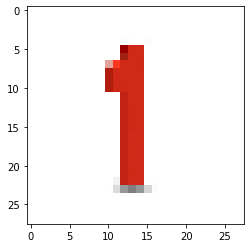

In [ ]:
import numpy as np
from keras.utils import load_img
from keras.utils import img_to_array
url='/content/số 1.png'
img = load_img(url,target_size=(28,28,1))
plt.imshow(img)


In [ ]:
import numpy as np
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
url = '/content/số 1.png'
img = load_img(url, target_size = (28,28,1))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 28*28*3)
img = img.astype('float32')
img = img/255
classname = ['airplane','automobile','bird','car','deer','dog','flog','horse','ship','truck']
a = int(np.argmax(model.predict(img), axis = 1))
print("Day la",classname[a])

In [ ]:
metric=model.evaluate(x_test,y_test,verbose=2)
print('sai số:',metric[0])
print('Độ chính xác',metric[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lower night'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


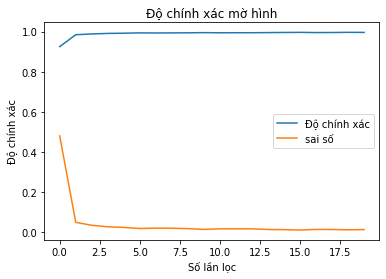

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Độ chính xác mờ hình')
plt.ylabel('Độ chính xác')
plt.xlabel('Số lần lọc')
plt.legend(['Độ chính xác','sai số'],loc='lower night')